# Gradient Descent (GD)
#### Gradient Descent is an optimization algorithm used to minimize a loss (cost) function by iteratively updating model parameters.

## In simple words:
#### It finds the minimum error by taking small steps downhill.

## Why Do We Need Gradient Descent?
#### Most ML models (Linear Regression, Logistic Regression, Neural Networks) need to:
<ul>
    <li>Minimize error</li>
    <li>Find best parameters (weights)</li>
</ul>

#### Closed-form solution isn’t always possible or efficient.
#### So we use iterative optimization.

## Intuition (Mountain Example)
#### Imagine you're standing on a mountain.
#### You want to reach the lowest point (valley).
#### You:
<ol type='1'>
    <li>Look at the slope</li>
    <li>Take a step downward</li>
    <li>Repeat</li>
</ol>

#### Eventually you reach minimum.
#### That’s gradient descent.

---

## Core Idea
#### We update parameters using:

## ```  θ = θ − α.∂J/∂θ ```

#### Where:
```
θ = parameter (weight)
α = learning rate
J = loss function
∂J/∂θ = gradient (slope)
```

---

### What is Gradient?
#### Gradient = direction of steepest increase.
#### Since we want to minimize loss, we go:
#### Opposite direction of gradient.

---

## Learning Rate (α)
#### Learning rate controls step size.

### Small α (Recommended)
<ul>
    <li>Slow learning</li>
    <li>More stable</li>
    <li>Takes longer</li>
</ul>


### Large α
<ul>
    <li>Faster learning</li>
    <li>Risk of overshooting</li>
    <li>May diverge</li>
</ul>

## Epocs 
#### An epoch is one complete pass of the entire training dataset through the algorithm.

---

## Loss Function Example (Linear Regression)
### ``` J(θ)= (1/n).​∑(y−y'​)^2 ```
#### We compute gradient of this function and update parameters.

---


## How It Works
#### When we train a model, we start with random guesses for our parameters (weights). Naturally, the model performs poorly at first. Gradient Descent iteratively adjusts these parameters to reduce the error.

#### 1. Calculate the Gradient: The algorithm calculates the derivative (the slope) of the loss function at the current point.
#### 2. Move Downhill: It takes a small step in the opposite direction of the gradient. If the slope is positive, it moves left; if negative, it moves right.
#### 3. The Learning Rate: This is the size of the steps. Too big, and you might overshoot the bottom; too small, and it will take forever to get there.
#### 4. Repeat: This continues until the slope is nearly zero, meaning you've reached the bottom—the Global Minimum

---

# Gradient Descent Step-by-step formula

In [2]:
from sklearn.datasets import make_regression
import numpy as np

In [3]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

In [5]:
import matplotlib.pyplot as plt

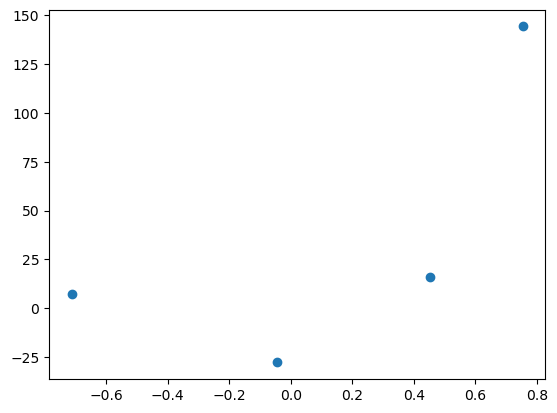

In [6]:
plt.scatter(X, y)

In [8]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [10]:
reg.coef_

array([78.35063668])

In [11]:
reg.intercept_

26.15963284313262

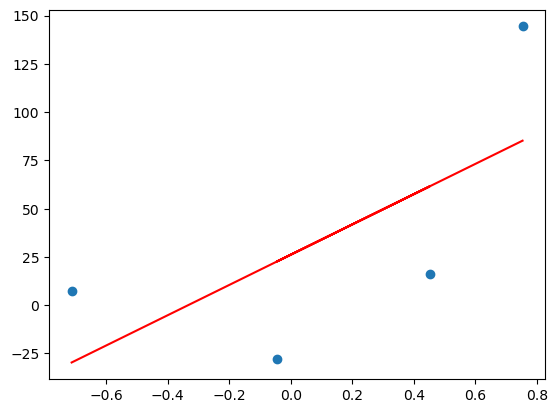

In [14]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')

In [37]:
# Let's apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 100
y_pred = ((78.35 * X ) + 100).reshape(4)

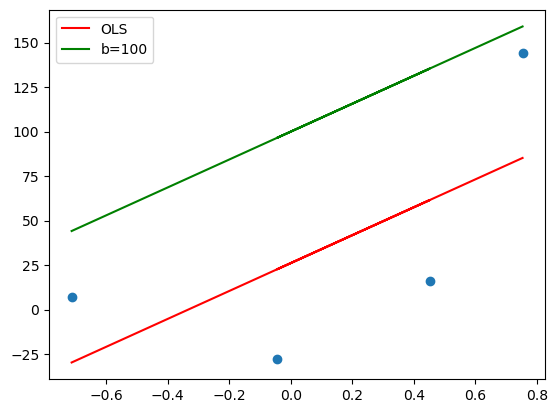

In [38]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color = 'red', label = 'OLS(Ordinary Least Squares)')
plt.plot(X, y_pred, color = 'green', label = 'b=100')
plt.legend()
plt.show()

In [47]:
 m = 78.35
b = 100
# derivative of MSE w.r.t b is: ∂J/∂b = -2 * ∑(y - mx - b)
loss_slope = -2* np.sum(y - m*X.ravel() - b)
loss_slope

590.7223659179078

In [48]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

59.072236591790784

In [49]:
# Calculating the new intercept
# b = b - lr * grad_b
b = b - step_size
b

40.927763408209216

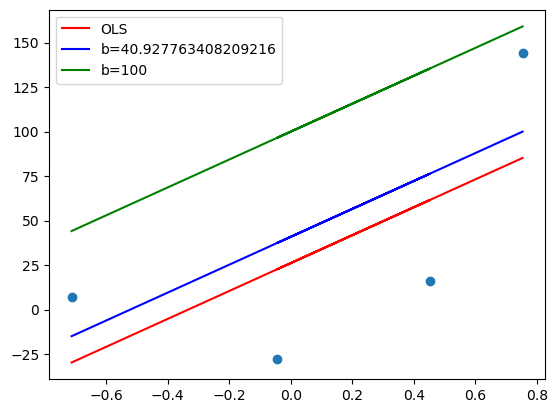

In [57]:
y_pred1 = ((78.35*X) + b).reshape(4)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred1, color = 'blue', label='b={}'.format(b))
plt.plot(X, y_pred, color='green', label='b=100')
plt.legend()
plt.show()

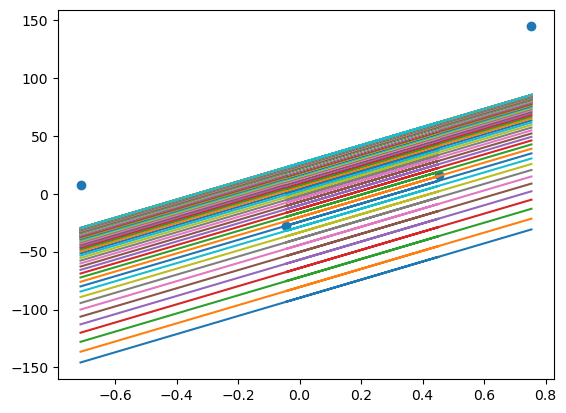

In [58]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

# Gradient Descent Code from Scratch

In [98]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [99]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

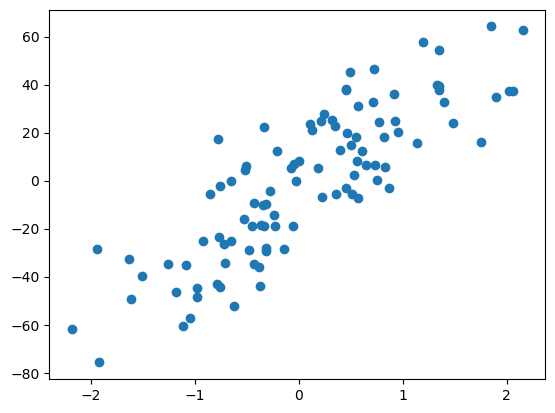

In [100]:
plt.scatter(X, y)

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [103]:
lr = LinearRegression()

In [104]:
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783816


In [105]:
y_pred = lr.predict(X_test)

In [106]:
r2_score(y_test, y_pred)

0.6345158782661013

In [138]:
import numpy as np

class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):

        n = len(y)

        for i in range(self.epochs):

            y_pred = self.m * X.ravel() + self.b

            loss_slope_b = -2 * np.sum(y - y_pred)
            loss_slope_m = -2 * np.sum((y - y_pred) * X.ravel())

            self.b = self.b - self.lr * loss_slope_b
            self.m = self.m - self.lr * loss_slope_m

            print(f"Epoch {i}: m={self.m}, b={self.b}")

    def predict(self, X):
        return self.m * X + self.b


In [148]:
gd = GDRegressor(0.001, 40)

In [149]:
gd.fit(X_train, y_train)

Epoch 0: m=90.04629892211885, b=-101.74579222551125
Epoch 1: m=81.45526459363266, b=-86.33159805246284
Epoch 2: m=74.04311055612814, b=-73.31405765077903
Epoch 3: m=67.65034931588339, b=-62.31925945284707
Epoch 4: m=62.13866746737299, b=-53.03182533775812
Epoch 5: m=57.388186604948714, b=-45.185716863687844
Epoch 6: m=53.295065421356476, b=-38.556490306941676
Epoch 7: m=49.76940295441549, b=-32.954771463400256
Epoch 8: m=46.73340716346204, b=-28.220757490729717
Epoch 9: m=44.1197968913004, b=-24.219583614929576
Epoch 10: m=41.87040880112065, b=-20.837418214159637
Epoch 11: m=39.93498408345094, b=-17.978171400492243
Epoch 12: m=38.27011262242971, b=-15.560720396685232
Epoch 13: m=36.83831491296171, b=-13.516570296741047
Epoch 14: m=35.607244351591326, b=-11.787881665108163
Epoch 15: m=34.54899460565792, b=-10.325807255788309
Epoch 16: m=33.63949861883491, b=-9.089089243664636
Epoch 17: m=32.8580074572265, b=-8.042876028669264
Epoch 18: m=32.186638658597445, b=-7.157724128122485
Epoch 19

In [150]:
y_pred = gd.predict(X_test)
r2_score(y_test, y_pred)

0.6338531280122912